In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(69)

# Generating the random points

In [3]:
M = 1
C = 1

In [4]:
x = np.random.random(size=(1000))
x

array([2.96249162e-01, 8.09067716e-01, 3.50252525e-01, 7.89409256e-01,
       5.61348976e-01, 2.53588954e-01, 1.04977084e-01, 5.84607292e-02,
       6.73292381e-01, 6.97829657e-01, 7.32783206e-01, 7.87874058e-01,
       7.63763204e-02, 3.17680597e-01, 7.41023277e-01, 3.28494229e-01,
       4.70145485e-01, 1.81085718e-01, 3.23504402e-01, 4.54906156e-01,
       5.29630515e-01, 2.93030549e-01, 2.76975148e-01, 6.78153072e-01,
       2.33458701e-01, 6.77255370e-01, 4.32332498e-01, 3.87666285e-01,
       3.35446207e-01, 5.13222124e-01, 9.87691114e-01, 5.30914371e-01,
       6.80436158e-01, 3.91134733e-01, 1.16556195e-01, 7.07225726e-01,
       4.13616095e-01, 4.56033032e-01, 3.31952536e-01, 9.37152433e-02,
       4.57716696e-01, 8.05792909e-01, 1.93509212e-01, 4.65028491e-01,
       1.90917522e-01, 7.58816648e-02, 3.19877122e-02, 1.52455550e-01,
       2.57092018e-01, 6.93737677e-02, 9.27189441e-01, 5.46625920e-01,
       9.67296037e-01, 8.97308522e-01, 3.91050218e-01, 3.78769731e-01,
      

In [5]:
y = M * x + C + np.random.normal(loc = 0, scale = 0.1, size = 1000)
y

array([1.41723051, 1.70264292, 1.39318528, 1.84755257, 1.55422137,
       1.13977843, 1.09991391, 0.91819955, 1.79553542, 1.70512488,
       1.65407678, 1.83117424, 1.19985258, 1.31006439, 1.79182113,
       1.29164839, 1.43007094, 1.14545036, 1.38781593, 1.38889841,
       1.38017878, 1.23386736, 1.05086992, 1.61656196, 1.30288608,
       1.65237932, 1.4778726 , 1.2750608 , 1.23425504, 1.57401082,
       1.97088727, 1.53149677, 1.80685918, 1.30753376, 0.97640911,
       1.76713925, 1.43315513, 1.40714058, 1.27412375, 1.26315334,
       1.64450502, 1.92338579, 1.1657029 , 1.42977088, 1.20430687,
       1.2704776 , 1.02247246, 1.10364638, 1.42142292, 1.11540151,
       2.0030868 , 1.58396524, 1.99356776, 1.94485545, 1.32587957,
       1.36578309, 1.79103899, 1.94474186, 1.41928798, 1.32815529,
       1.0026105 , 1.46424205, 1.1688924 , 2.02210639, 2.00228902,
       1.20020238, 1.85137319, 1.24099897, 2.08019344, 1.29182302,
       1.79198272, 1.42023497, 1.18218862, 1.69685249, 1.43439

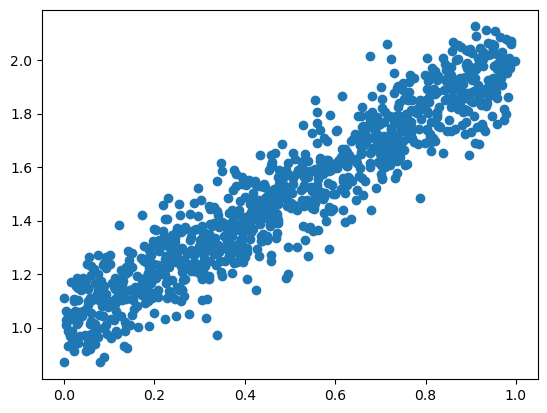

In [6]:
plt.scatter(x,y)

# Simple Linear Regression

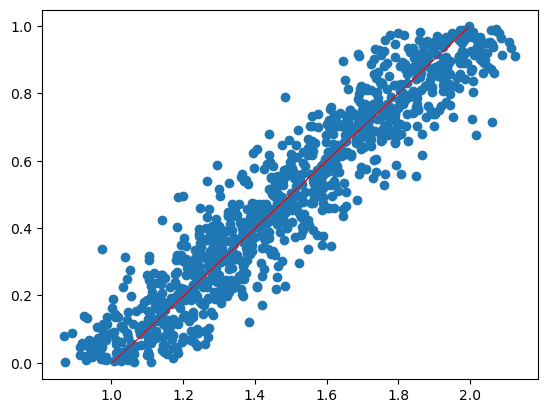

In [7]:
my=np.average(y)
mx=np.average(x)

sn=sd=0
for i in range(1000):
    sn+=(x[i]*y[i]-my*x[i])
    sd+=(x[i]**2-mx*x[i])

m=sn/sd
c=my-m*mx
pred=m*x+c
plt.scatter(y, x)
plt.plot(pred,x,c='red',linewidth=0.5)

In [8]:
m

0.9963538530774319

In [9]:
c

1.003128048352553

# Gradient Descent

In [10]:
def step(X, Y, slope, intercept):
    
    X_ = np.append(x.reshape((-1,1)), np.ones((len(x),1)), axis = 1)
    weights = np.array([slope, intercept])
    
    y_pred = X_ @ weights
    
    stepSize = np.array([0.,0.])
    for i in range(len(y_pred)):
        stepSize += (-2 * (y_pred[i] - Y[i]) * X_[i])
        
    stepSize /= len(y_pred)
    
    print(stepSize, max(X), max(Y), max(y_pred))
    
    return stepSize

In [11]:
step(x, y, 1, 1)

[0.00072248 0.00265541] 0.9985654117557039 2.1260874678939277 1.998565411755704


array([0.00072248, 0.00265541])

In [12]:
slope, intercept = 1, 1
learningRate = 0.001

for i in range(10000):
    dSlope, dIntercept = list(step(x, y, slope, intercept))
    slope += dSlope * learningRate
    intercept += dIntercept * learningRate

[0.00072248 0.00265541] 0.9985654117557039 2.1260874678939277 1.998565411755704
[0.00071939 0.00264939] 0.9985654117557039 2.1260874678939277 1.998568788613273
[0.00071631 0.00264338] 0.9985654117557039 2.1260874678939277 1.9985721563597425
[0.00071323 0.00263739] 0.9985654117557039 2.1260874678939277 1.9985755150181572
[0.00071016 0.00263141] 0.9985654117557039 2.1260874678939277 1.9985788646115052
[0.0007071  0.00262544] 0.9985654117557039 2.1260874678939277 1.9985822051627156
[0.00070405 0.00261949] 0.9985654117557039 2.1260874678939277 1.9985855366946597
[0.00070101 0.00261356] 0.9985654117557039 2.1260874678939277 1.9985888592301515
[0.00069797 0.00260764] 0.9985654117557039 2.1260874678939277 1.9985921727919476
[0.00069494 0.00260173] 0.9985654117557039 2.1260874678939277 1.998595477402747
[0.00069192 0.00259585] 0.9985654117557039 2.1260874678939277 1.9985987730851915
[0.00068891 0.00258997] 0.9985654117557039 2.1260874678939277 1.9986020598618655
[0.00068591 0.00258411] 0.99856

[0.00038958 0.00200379] 0.9985654117557039 2.1260874678939277 1.9989260996273424
[0.00038735 0.0019994 ] 0.9985654117557039 2.1260874678939277 1.9989284924359239
[0.00038512 0.00199502] 0.9985654117557039 2.1260874678939277 1.9989308786237432
[0.0003829  0.00199065] 0.9985654117557039 2.1260874678939277 1.9989332582075663
[0.00038069 0.00198629] 0.9985654117557039 2.1260874678939277 1.9989356312041175
[0.00037848 0.00198194] 0.9985654117557039 2.1260874678939277 1.9989379976300778
[0.00037627 0.0019776 ] 0.9985654117557039 2.1260874678939277 1.9989403575020877
[0.00037408 0.00197327] 0.9985654117557039 2.1260874678939277 1.9989427108367441
[0.00037189 0.00196896] 0.9985654117557039 2.1260874678939277 1.9989450576506032
[0.0003697  0.00196465] 0.9985654117557039 2.1260874678939277 1.9989473979601788
[0.00036752 0.00196036] 0.9985654117557039 2.1260874678939277 1.9989497317819438
[0.00036534 0.00195607] 0.9985654117557039 2.1260874678939277 1.9989520591323289
[0.00036318 0.0019518 ] 0.99

[0.00013681 0.00150312] 0.9985654117557039 2.1260874678939277 1.9991938029796543
[0.00013524 0.00149998] 0.9985654117557039 2.1260874678939277 1.9991954427167644
[0.00013367 0.00149685] 0.9985654117557039 2.1260874678939277 1.9991970777416013
[0.0001321  0.00149372] 0.9985654117557039 2.1260874678939277 1.9991987080661189
[0.00013054 0.00149061] 0.9985654117557039 2.1260874678939277 1.9992003337022402
[0.00012899 0.00148749] 0.9985654117557039 2.1260874678939277 1.9992019546618591
[0.00012743 0.00148439] 0.9985654117557039 2.1260874678939277 1.9992035709568392
[0.00012588 0.0014813 ] 0.9985654117557039 2.1260874678939277 1.9992051825990136
[0.00012434 0.00147821] 0.9985654117557039 2.1260874678939277 1.999206789600186
[0.0001228  0.00147513] 0.9985654117557039 2.1260874678939277 1.9992083919721302
[0.00012126 0.00147206] 0.9985654117557039 2.1260874678939277 1.9992099897265907
[0.00011973 0.001469  ] 0.9985654117557039 2.1260874678939277 1.9992115828752821
[0.0001182  0.00146594] 0.998

[-4.65114414e-05  1.13367896e-03] 0.9985654117557039 2.1260874678939277 1.999381346597743
[-4.76007960e-05  1.13145753e-03] 0.9985654117557039 2.1260874678939277 1.9993824338319877
[-4.86872498e-05  1.12924163e-03] 0.9985654117557039 2.1260874678939277 1.9993835177570136
[-4.97708101e-05  1.12703122e-03] 0.9985654117557039 2.1260874678939277 1.999384598381237
[-5.08514843e-05  1.12482631e-03] 0.9985654117557039 2.1260874678939277 1.999385675713051
[-5.19292796e-05  1.12262688e-03] 0.9985654117557039 2.1260874678939277 1.9993867497608293
[-5.30042034e-05  1.12043290e-03] 0.9985654117557039 2.1260874678939277 1.999387820532923
[-5.40762629e-05  1.11824438e-03] 0.9985654117557039 2.1260874678939277 1.9993888880376631
[-5.51454653e-05  1.11606130e-03] 0.9985654117557039 2.1260874678939277 1.9993899522833591
[-5.62118179e-05  1.11388363e-03] 0.9985654117557039 2.1260874678939277 1.9993910132783
[-5.72753279e-05  1.11171137e-03] 0.9985654117557039 2.1260874678939277 1.9993920710307531
[-5.83

[-0.00016314  0.00089304] 0.9985654117557039 2.1260874678939277 1.9994948171793419
[-0.00016392  0.00089142] 0.9985654117557039 2.1260874678939277 1.9994955473179736
[-0.00016469  0.0008898 ] 0.9985654117557039 2.1260874678939277 1.9994962750567153
[-0.00016546  0.00088818] 0.9985654117557039 2.1260874678939277 1.9994970004016879
[-0.00016623  0.00088657] 0.9985654117557039 2.1260874678939277 1.999497723358998
[-0.000167    0.00088496] 0.9985654117557039 2.1260874678939277 1.999498443934736
[-0.00016776  0.00088335] 0.9985654117557039 2.1260874678939277 1.999499162134978
[-0.00016853  0.00088175] 0.9985654117557039 2.1260874678939277 1.9994998779657838
[-0.00016929  0.00088016] 0.9985654117557039 2.1260874678939277 1.9995005914331982
[-0.00017005  0.00087856] 0.9985654117557039 2.1260874678939277 1.9995013025432509
[-0.0001708   0.00087697] 0.9985654117557039 2.1260874678939277 1.9995020113019564
[-0.00017156  0.00087539] 0.9985654117557039 2.1260874678939277 1.999502717715314
[-0.0001

[-0.00024482  0.00071926] 0.9985654117557039 2.1260874678939277 1.999568814768487
[-0.00024537  0.00071807] 0.9985654117557039 2.1260874678939277 1.9995692895599941
[-0.00024592  0.00071687] 0.9985654117557039 2.1260874678939277 1.9995697626041464
[-0.00024647  0.00071568] 0.9985654117557039 2.1260874678939277 1.9995702339054193
[-0.00024702  0.00071449] 0.9985654117557039 2.1260874678939277 1.9995707034682777
[-0.00024756  0.00071331] 0.9985654117557039 2.1260874678939277 1.9995711712971738
[-0.00024811  0.00071213] 0.9985654117557039 2.1260874678939277 1.9995716373965498
[-0.00024865  0.00071095] 0.9985654117557039 2.1260874678939277 1.9995721017708357
[-0.00024919  0.00070977] 0.9985654117557039 2.1260874678939277 1.9995725644244513
[-0.00024973  0.0007086 ] 0.9985654117557039 2.1260874678939277 1.9995730253618045
[-0.00025027  0.00070743] 0.9985654117557039 2.1260874678939277 1.9995734845872928
[-0.0002508   0.00070626] 0.9985654117557039 2.1260874678939277 1.999573942105302
[-0.00

[-0.00030335  0.00058938] 0.9985654117557039 2.1260874678939277 1.9996162284592502
[-0.00030373  0.0005885 ] 0.9985654117557039 2.1260874678939277 1.999616514921693
[-0.00030412  0.00058762] 0.9985654117557039 2.1260874678939277 1.9996168001203656
[-0.0003045   0.00058675] 0.9985654117557039 2.1260874678939277 1.9996170840585235
[-0.00030488  0.00058587] 0.9985654117557039 2.1260874678939277 1.9996173667394141
[-0.00030526  0.000585  ] 0.9985654117557039 2.1260874678939277 1.9996176481662764
[-0.00030564  0.00058413] 0.9985654117557039 2.1260874678939277 1.99961792834234
[-0.00030602  0.00058327] 0.9985654117557039 2.1260874678939277 1.9996182072708288
[-0.0003064  0.0005824] 0.9985654117557039 2.1260874678939277 1.9996184849549565
[-0.00030678  0.00058154] 0.9985654117557039 2.1260874678939277 1.9996187613979295
[-0.00030715  0.00058068] 0.9985654117557039 2.1260874678939277 1.9996190366029463
[-0.00030752  0.00057982] 0.9985654117557039 2.1260874678939277 1.9996193105731965
[-0.00030

[-0.00035412  0.00046849] 0.9985654117557039 2.1260874678939277 1.9996487952301099
[-0.00035436  0.0004679 ] 0.9985654117557039 2.1260874678939277 1.9996489100992583
[-0.00035459  0.00046731] 0.9985654117557039 2.1260874678939277 1.999649024148682
[-0.00035482  0.00046673] 0.9985654117557039 2.1260874678939277 1.999649137380515
[-0.00035505  0.00046615] 0.9985654117557039 2.1260874678939277 1.9996492497968865
[-0.00035528  0.00046556] 0.9985654117557039 2.1260874678939277 1.99964936139992
[-0.00035551  0.00046498] 0.9985654117557039 2.1260874678939277 1.9996494721917337
[-0.00035574  0.0004644 ] 0.9985654117557039 2.1260874678939277 1.9996495821744409
[-0.00035597  0.00046383] 0.9985654117557039 2.1260874678939277 1.999649691350149
[-0.00035619  0.00046325] 0.9985654117557039 2.1260874678939277 1.9996497997209604
[-0.00035642  0.00046268] 0.9985654117557039 2.1260874678939277 1.9996499072889713
[-0.00035665  0.0004621 ] 0.9985654117557039 2.1260874678939277 1.9996500140562743
[-0.00035

[-0.00038252  0.00039226] 0.9985654117557039 2.1260874678939277 1.9996579999778366
[-0.00038265  0.00039186] 0.9985654117557039 2.1260874678939277 1.9996580102750694
[-0.00038279  0.00039145] 0.9985654117557039 2.1260874678939277 1.9996580200266223
[-0.00038293  0.00039105] 0.9985654117557039 2.1260874678939277 1.9996580292339372
[-0.00038307  0.00039064] 0.9985654117557039 2.1260874678939277 1.999658037898453
[-0.00038321  0.00039024] 0.9985654117557039 2.1260874678939277 1.9996580460216045
[-0.00038334  0.00038984] 0.9985654117557039 2.1260874678939277 1.999658053604823
[-0.00038348  0.00038944] 0.9985654117557039 2.1260874678939277 1.999658060649536
[-0.00038361  0.00038904] 0.9985654117557039 2.1260874678939277 1.999658067157168
[-0.00038375  0.00038864] 0.9985654117557039 2.1260874678939277 1.999658073129139
[-0.00038388  0.00038824] 0.9985654117557039 2.1260874678939277 1.9996580785668665
[-0.00038402  0.00038784] 0.9985654117557039 2.1260874678939277 1.999658083471763
[-0.000384

[-0.00039972  0.00033614] 0.9985654117557039 2.1260874678939277 1.9996532132793714
[-0.00039979  0.00033587] 0.9985654117557039 2.1260874678939277 1.9996531502753685
[-0.00039987  0.00033559] 0.9985654117557039 2.1260874678939277 1.9996530869214104
[-0.00039994  0.00033531] 0.9985654117557039 2.1260874678939277 1.9996530232184446
[-0.00040001  0.00033504] 0.9985654117557039 2.1260874678939277 1.999652959167416
[-0.00040008  0.00033476] 0.9985654117557039 2.1260874678939277 1.9996528947692673
[-0.00040015  0.00033449] 0.9985654117557039 2.1260874678939277 1.9996528300249388
[-0.00040022  0.00033421] 0.9985654117557039 2.1260874678939277 1.9996527649353681
[-0.00040029  0.00033394] 0.9985654117557039 2.1260874678939277 1.9996526995014912
[-0.00040036  0.00033367] 0.9985654117557039 2.1260874678939277 1.9996526337242404
[-0.00040043  0.0003334 ] 0.9985654117557039 2.1260874678939277 1.9996525676045471
[-0.0004005   0.00033312] 0.9985654117557039 2.1260874678939277 1.9996525011433395
[-0.0

[-0.00040768  0.00029914] 0.9985654117557039 2.1260874678939277 1.9996394736518168
[-0.00040771  0.00029895] 0.9985654117557039 2.1260874678939277 1.999639365699701
[-0.00040774  0.00029875] 0.9985654117557039 2.1260874678939277 1.999639257521137
[-0.00040777  0.00029856] 0.9985654117557039 2.1260874678939277 1.999639149116759
[-0.0004078   0.00029836] 0.9985654117557039 2.1260874678939277 1.9996390404872009
[-0.00040783  0.00029817] 0.9985654117557039 2.1260874678939277 1.9996389316330936
[-0.00040786  0.00029797] 0.9985654117557039 2.1260874678939277 1.9996388225550672
[-0.00040789  0.00029778] 0.9985654117557039 2.1260874678939277 1.9996387132537499
[-0.00040792  0.00029759] 0.9985654117557039 2.1260874678939277 1.9996386037297689
[-0.00040795  0.0002974 ] 0.9985654117557039 2.1260874678939277 1.9996384939837486
[-0.00040798  0.0002972 ] 0.9985654117557039 2.1260874678939277 1.9996383840163134
[-0.00040801  0.00029701] 0.9985654117557039 2.1260874678939277 1.9996382738280845
[-0.000

[-0.00041024  0.00027214] 0.9985654117557039 2.1260874678939277 1.9996192952476526
[-0.00041024  0.000272  ] 0.9985654117557039 2.1260874678939277 1.9996191577315403
[-0.00041025  0.00027186] 0.9985654117557039 2.1260874678939277 1.9996190200738124
[-0.00041025  0.00027172] 0.9985654117557039 2.1260874678939277 1.9996188822748877
[-0.00041025  0.00027158] 0.9985654117557039 2.1260874678939277 1.9996187443351854
[-0.00041025  0.00027144] 0.9985654117557039 2.1260874678939277 1.9996186062551222
[-0.00041025  0.00027131] 0.9985654117557039 2.1260874678939277 1.999618468035115
[-0.00041026  0.00027117] 0.9985654117557039 2.1260874678939277 1.9996183296755787
[-0.00041026  0.00027103] 0.9985654117557039 2.1260874678939277 1.999618191176928
[-0.00041026  0.00027089] 0.9985654117557039 2.1260874678939277 1.9996180525395757
[-0.00041026  0.00027076] 0.9985654117557039 2.1260874678939277 1.9996179137639345
[-0.00041026  0.00027062] 0.9985654117557039 2.1260874678939277 1.9996177748504151
[-0.00

[-0.0004089   0.00025181] 0.9985654117557039 2.1260874678939277 1.9995938749491862
[-0.00040888  0.00025171] 0.9985654117557039 2.1260874678939277 1.999593718444126
[-0.00040886  0.00025161] 0.9985654117557039 2.1260874678939277 1.9995935618559604
[-0.00040885  0.00025151] 0.9985654117557039 2.1260874678939277 1.999593405184961
[-0.00040883  0.00025141] 0.9985654117557039 2.1260874678939277 1.9995932484313972
[-0.00040881  0.00025131] 0.9985654117557039 2.1260874678939277 1.9995930915955382
[-0.0004088   0.00025121] 0.9985654117557039 2.1260874678939277 1.9995929346776529
[-0.00040878  0.00025111] 0.9985654117557039 2.1260874678939277 1.9995927776780094
[-0.00040876  0.00025101] 0.9985654117557039 2.1260874678939277 1.9995926205968746
[-0.00040874  0.00025091] 0.9985654117557039 2.1260874678939277 1.9995924634345152
[-0.00040873  0.00025082] 0.9985654117557039 2.1260874678939277 1.999592306191197
[-0.00040871  0.00025072] 0.9985654117557039 2.1260874678939277 1.9995921488671855
[-0.000

[-0.00040514  0.00023759] 0.9985654117557039 2.1260874678939277 1.9995672741739892
[-0.00040511  0.00023751] 0.9985654117557039 2.1260874678939277 1.999567107206274
[-0.00040508  0.00023744] 0.9985654117557039 2.1260874678939277 1.9995669401917593
[-0.00040505  0.00023736] 0.9985654117557039 2.1260874678939277 1.9995667731306233
[-0.00040502  0.00023729] 0.9985654117557039 2.1260874678939277 1.999566606023043
[-0.00040499  0.00023721] 0.9985654117557039 2.1260874678939277 1.9995664388691956
[-0.00040497  0.00023714] 0.9985654117557039 2.1260874678939277 1.999566271669258
[-0.00040494  0.00023707] 0.9985654117557039 2.1260874678939277 1.9995661044234057
[-0.00040491  0.00023699] 0.9985654117557039 2.1260874678939277 1.9995659371318144
[-0.00040488  0.00023692] 0.9985654117557039 2.1260874678939277 1.9995657697946596
[-0.00040485  0.00023684] 0.9985654117557039 2.1260874678939277 1.9995656024121158
[-0.00040482  0.00023677] 0.9985654117557039 2.1260874678939277 1.9995654349843575
[-0.000

[-0.0003992   0.00022567] 0.9985654117557039 2.1260874678939277 1.9995362725305332
[-0.00039916  0.00022561] 0.9985654117557039 2.1260874678939277 1.9995360995712073
[-0.00039913  0.00022555] 0.9985654117557039 2.1260874678939277 1.999535926590965
[-0.00039909  0.0002255 ] 0.9985654117557039 2.1260874678939277 1.999535753589917
[-0.00039906  0.00022544] 0.9985654117557039 2.1260874678939277 1.9995355805681745
[-0.00039902  0.00022538] 0.9985654117557039 2.1260874678939277 1.999535407525848
[-0.00039898  0.00022533] 0.9985654117557039 2.1260874678939277 1.999535234463048
[-0.00039895  0.00022527] 0.9985654117557039 2.1260874678939277 1.999535061379885
[-0.00039891  0.00022521] 0.9985654117557039 2.1260874678939277 1.999534888276468
[-0.00039887  0.00022516] 0.9985654117557039 2.1260874678939277 1.9995347151529073
[-0.00039884  0.0002251 ] 0.9985654117557039 2.1260874678939277 1.9995345420093114
[-0.0003988   0.00022505] 0.9985654117557039 2.1260874678939277 1.99953436884579
[-0.00039876

[-0.00039328  0.00021769] 0.9985654117557039 2.1260874678939277 1.999509450757373
[-0.00039324  0.00021765] 0.9985654117557039 2.1260874678939277 1.9995092757309167
[-0.0003932  0.0002176] 0.9985654117557039 2.1260874678939277 1.9995091006976804
[-0.00039316  0.00021755] 0.9985654117557039 2.1260874678939277 1.9995089256577383
[-0.00039312  0.00021751] 0.9985654117557039 2.1260874678939277 1.9995087506111648
[-0.00039308  0.00021746] 0.9985654117557039 2.1260874678939277 1.9995085755580342
[-0.00039304  0.00021741] 0.9985654117557039 2.1260874678939277 1.9995084004984203
[-0.000393    0.00021737] 0.9985654117557039 2.1260874678939277 1.9995082254323968
[-0.00039296  0.00021732] 0.9985654117557039 2.1260874678939277 1.9995080503600366
[-0.00039292  0.00021727] 0.9985654117557039 2.1260874678939277 1.999507875281414
[-0.00039288  0.00021723] 0.9985654117557039 2.1260874678939277 1.9995077001966017
[-0.00039284  0.00021718] 0.9985654117557039 2.1260874678939277 1.9995075251056726
[-0.0003

[-0.00038671  0.00021086] 0.9985654117557039 2.1260874678939277 1.9994817559982718
[-0.00038666  0.00021082] 0.9985654117557039 2.1260874678939277 1.999481580709882
[-0.00038662  0.00021078] 0.9985654117557039 2.1260874678939277 1.9994814054243488
[-0.00038658  0.00021074] 0.9985654117557039 2.1260874678939277 1.999481230141721
[-0.00038654  0.00021071] 0.9985654117557039 2.1260874678939277 1.9994810548620476
[-0.00038649  0.00021067] 0.9985654117557039 2.1260874678939277 1.9994808795853773
[-0.00038645  0.00021063] 0.9985654117557039 2.1260874678939277 1.9994807043117588
[-0.00038641  0.00021059] 0.9985654117557039 2.1260874678939277 1.9994805290412407
[-0.00038637  0.00021055] 0.9985654117557039 2.1260874678939277 1.9994803537738712
[-0.00038632  0.00021051] 0.9985654117557039 2.1260874678939277 1.9994801785096987
[-0.00038628  0.00021047] 0.9985654117557039 2.1260874678939277 1.9994800032487712
[-0.00038624  0.00021043] 0.9985654117557039 2.1260874678939277 1.9994798279911368
[-0.00

[-0.0003797   0.00020488] 0.9985654117557039 2.1260874678939277 1.9994536015660154
[-0.00037966  0.00020484] 0.9985654117557039 2.1260874678939277 1.999453427288021
[-0.00037961  0.00020481] 0.9985654117557039 2.1260874678939277 1.999453253019297
[-0.00037957  0.00020477] 0.9985654117557039 2.1260874678939277 1.9994530787598759
[-0.00037952  0.00020474] 0.9985654117557039 2.1260874678939277 1.9994529045097893
[-0.00037948  0.0002047 ] 0.9985654117557039 2.1260874678939277 1.9994527302690681
[-0.00037944  0.00020467] 0.9985654117557039 2.1260874678939277 1.9994525560377445
[-0.00037939  0.00020464] 0.9985654117557039 2.1260874678939277 1.9994523818158494
[-0.00037935  0.0002046 ] 0.9985654117557039 2.1260874678939277 1.999452207603414
[-0.0003793   0.00020457] 0.9985654117557039 2.1260874678939277 1.99945203340047
[-0.00037926  0.00020453] 0.9985654117557039 2.1260874678939277 1.9994518592070478
[-0.00037922  0.0002045 ] 0.9985654117557039 2.1260874678939277 1.9994516850231792
[-0.00037

[-0.0003725   0.00019955] 0.9985654117557039 2.1260874678939277 1.9994255092661668
[-0.00037245  0.00019951] 0.9985654117557039 2.1260874678939277 1.9994253368487742
[-0.00037241  0.00019948] 0.9985654117557039 2.1260874678939277 1.9994251644447951
[-0.00037236  0.00019945] 0.9985654117557039 2.1260874678939277 1.9994249920542488
[-0.00037232  0.00019942] 0.9985654117557039 2.1260874678939277 1.9994248196771562
[-0.00037227  0.00019939] 0.9985654117557039 2.1260874678939277 1.9994246473135366
[-0.00037223  0.00019936] 0.9985654117557039 2.1260874678939277 1.9994244749634105
[-0.00037218  0.00019933] 0.9985654117557039 2.1260874678939277 1.9994243026267973
[-0.00037214  0.0001993 ] 0.9985654117557039 2.1260874678939277 1.9994241303037172
[-0.00037209  0.00019926] 0.9985654117557039 2.1260874678939277 1.9994239579941901
[-0.00037205  0.00019923] 0.9985654117557039 2.1260874678939277 1.9994237856982355
[-0.00037201  0.0001992 ] 0.9985654117557039 2.1260874678939277 1.9994236134158732
[-0.

[-0.00036551  0.00019487] 0.9985654117557039 2.1260874678939277 1.9993987855470015
[-0.00036547  0.00019484] 0.9985654117557039 2.1260874678939277 1.9993986154329801
[-0.00036542  0.00019481] 0.9985654117557039 2.1260874678939277 1.9993984453348994
[-0.00036538  0.00019479] 0.9985654117557039 2.1260874678939277 1.999398275252772
[-0.00036533  0.00019476] 0.9985654117557039 2.1260874678939277 1.99939810518661
[-0.00036529  0.00019473] 0.9985654117557039 2.1260874678939277 1.9993979351364266
[-0.00036524  0.0001947 ] 0.9985654117557039 2.1260874678939277 1.999397765102234
[-0.0003652   0.00019467] 0.9985654117557039 2.1260874678939277 1.9993975950840452
[-0.00036515  0.00019464] 0.9985654117557039 2.1260874678939277 1.9993974250818725
[-0.00036511  0.00019461] 0.9985654117557039 2.1260874678939277 1.9993972550957277
[-0.00036506  0.00019458] 0.9985654117557039 2.1260874678939277 1.9993970851256244
[-0.00036502  0.00019456] 0.9985654117557039 2.1260874678939277 1.999396915171574
[-0.00036

[-0.00035929  0.00019099] 0.9985654117557039 2.1260874678939277 1.9993752976058494
[-0.00035925  0.00019096] 0.9985654117557039 2.1260874678939277 1.9993751298137574
[-0.00035921  0.00019093] 0.9985654117557039 2.1260874678939277 1.999374962039039
[-0.00035916  0.00019091] 0.9985654117557039 2.1260874678939277 1.9993747942817026
[-0.00035912  0.00019088] 0.9985654117557039 2.1260874678939277 1.9993746265417562
[-0.00035907  0.00019085] 0.9985654117557039 2.1260874678939277 1.999374458819208
[-0.00035903  0.00019082] 0.9985654117557039 2.1260874678939277 1.9993742911140657
[-0.00035898  0.0001908 ] 0.9985654117557039 2.1260874678939277 1.999374123426338
[-0.00035894  0.00019077] 0.9985654117557039 2.1260874678939277 1.9993739557560324
[-0.00035889  0.00019074] 0.9985654117557039 2.1260874678939277 1.9993737881031568
[-0.00035885  0.00019072] 0.9985654117557039 2.1260874678939277 1.9993736204677197
[-0.0003588   0.00019069] 0.9985654117557039 2.1260874678939277 1.9993734528497287
[-0.000

[-0.0003525   0.00018694] 0.9985654117557039 2.1260874678939277 1.9993498316564255
[-0.00035246  0.00018692] 0.9985654117557039 2.1260874678939277 1.99934966660284
[-0.00035241  0.00018689] 0.9985654117557039 2.1260874678939277 1.9993495015675973
[-0.00035237  0.00018686] 0.9985654117557039 2.1260874678939277 1.9993493365507011
[-0.00035232  0.00018684] 0.9985654117557039 2.1260874678939277 1.999349171552157
[-0.00035228  0.00018681] 0.9985654117557039 2.1260874678939277 1.9993490065719686
[-0.00035224  0.00018679] 0.9985654117557039 2.1260874678939277 1.9993488416101415
[-0.00035219  0.00018676] 0.9985654117557039 2.1260874678939277 1.99934867666668
[-0.00035215  0.00018674] 0.9985654117557039 2.1260874678939277 1.9993485117415886
[-0.0003521   0.00018671] 0.9985654117557039 2.1260874678939277 1.9993483468348718
[-0.00035206  0.00018668] 0.9985654117557039 2.1260874678939277 1.9993481819465344
[-0.00035202  0.00018666] 0.9985654117557039 2.1260874678939277 1.999348017076581
[-0.000351

[-0.00034504  0.00018266] 0.9985654117557039 2.1260874678939277 1.9993220392503512
[-0.000345    0.00018264] 0.9985654117557039 2.1260874678939277 1.9993218773692156
[-0.00034495  0.00018261] 0.9985654117557039 2.1260874678939277 1.9993217155069924
[-0.00034491  0.00018259] 0.9985654117557039 2.1260874678939277 1.999321553663684
[-0.00034487  0.00018257] 0.9985654117557039 2.1260874678939277 1.999321391839292
[-0.00034482  0.00018254] 0.9985654117557039 2.1260874678939277 1.9993212300338188
[-0.00034478  0.00018252] 0.9985654117557039 2.1260874678939277 1.999321068247267
[-0.00034474  0.00018249] 0.9985654117557039 2.1260874678939277 1.999320906479638
[-0.00034469  0.00018247] 0.9985654117557039 2.1260874678939277 1.9993207447309342
[-0.00034465  0.00018244] 0.9985654117557039 2.1260874678939277 1.999320583001158
[-0.0003446   0.00018242] 0.9985654117557039 2.1260874678939277 1.999320421290311
[-0.00034456  0.00018239] 0.9985654117557039 2.1260874678939277 1.9993202595983959
[-0.000344

[-0.00033667  0.000178  ] 0.9985654117557039 2.1260874678939277 1.9992909903538636
[-0.00033662  0.00017798] 0.9985654117557039 2.1260874678939277 1.9992908321697747
[-0.00033658  0.00017795] 0.9985654117557039 2.1260874678939277 1.99929067400483
[-0.00033654  0.00017793] 0.9985654117557039 2.1260874678939277 1.9992905158590304
[-0.0003365   0.00017791] 0.9985654117557039 2.1260874678939277 1.9992903577323755
[-0.00033645  0.00017788] 0.9985654117557039 2.1260874678939277 1.9992901996248662
[-0.00033641  0.00017786] 0.9985654117557039 2.1260874678939277 1.999290041536503
[-0.00033637  0.00017784] 0.9985654117557039 2.1260874678939277 1.9992898834672856
[-0.00033633  0.00017781] 0.9985654117557039 2.1260874678939277 1.9992897254172148
[-0.00033628  0.00017779] 0.9985654117557039 2.1260874678939277 1.9992895673862907
[-0.00033624  0.00017776] 0.9985654117557039 2.1260874678939277 1.999289409374514
[-0.0003362   0.00017774] 0.9985654117557039 2.1260874678939277 1.9992892513818843
[-0.0003

[-0.00032951  0.00017409] 0.9985654117557039 2.1260874678939277 1.9992645290882143
[-0.00032947  0.00017407] 0.9985654117557039 2.1260874678939277 1.9992643741396043
[-0.00032943  0.00017404] 0.9985654117557039 2.1260874678939277 1.9992642192101122
[-0.00032938  0.00017402] 0.9985654117557039 2.1260874678939277 1.999264064299737
[-0.00032934  0.000174  ] 0.9985654117557039 2.1260874678939277 1.9992639094084785
[-0.0003293   0.00017397] 0.9985654117557039 2.1260874678939277 1.999263754536336
[-0.00032926  0.00017395] 0.9985654117557039 2.1260874678939277 1.9992635996833088
[-0.00032922  0.00017393] 0.9985654117557039 2.1260874678939277 1.9992634448493962
[-0.00032917  0.00017391] 0.9985654117557039 2.1260874678939277 1.9992632900345977
[-0.00032913  0.00017388] 0.9985654117557039 2.1260874678939277 1.9992631352389123
[-0.00032909  0.00017386] 0.9985654117557039 2.1260874678939277 1.9992629804623399
[-0.00032905  0.00017384] 0.9985654117557039 2.1260874678939277 1.9992628257048795
[-0.00

[-0.00032212  0.0001701 ] 0.9985654117557039 2.1260874678939277 1.9992372486648555
[-0.00032208  0.00017007] 0.9985654117557039 2.1260874678939277 1.999237097105826
[-0.00032204  0.00017005] 0.9985654117557039 2.1260874678939277 1.9992369455657437
[-0.00032199  0.00017003] 0.9985654117557039 2.1260874678939277 1.9992367940446076
[-0.00032195  0.00017001] 0.9985654117557039 2.1260874678939277 1.9992366425424166
[-0.00032191  0.00016999] 0.9985654117557039 2.1260874678939277 1.9992364910591691
[-0.00032187  0.00016996] 0.9985654117557039 2.1260874678939277 1.9992363395948638
[-0.00032183  0.00016994] 0.9985654117557039 2.1260874678939277 1.9992361881494998
[-0.00032179  0.00016992] 0.9985654117557039 2.1260874678939277 1.999236036723076
[-0.00032175  0.0001699 ] 0.9985654117557039 2.1260874678939277 1.9992358853155903
[-0.00032171  0.00016988] 0.9985654117557039 2.1260874678939277 1.999235733927042
[-0.00032167  0.00016985] 0.9985654117557039 2.1260874678939277 1.99923558255743
[-0.00032

[-0.00031593  0.00016678] 0.9985654117557039 2.1260874678939277 1.9992144283580378
[-0.00031589  0.00016676] 0.9985654117557039 2.1260874678939277 1.9992142796631711
[-0.00031585  0.00016674] 0.9985654117557039 2.1260874678939277 1.9992141309870335
[-0.00031581  0.00016671] 0.9985654117557039 2.1260874678939277 1.999213982329623
[-0.00031576  0.00016669] 0.9985654117557039 2.1260874678939277 1.9992138336909382
[-0.00031572  0.00016667] 0.9985654117557039 2.1260874678939277 1.999213685070977
[-0.00031568  0.00016665] 0.9985654117557039 2.1260874678939277 1.9992135364697385
[-0.00031564  0.00016663] 0.9985654117557039 2.1260874678939277 1.9992133878872205
[-0.0003156   0.00016661] 0.9985654117557039 2.1260874678939277 1.9992132393234217
[-0.00031556  0.00016658] 0.9985654117557039 2.1260874678939277 1.9992130907783403
[-0.00031552  0.00016656] 0.9985654117557039 2.1260874678939277 1.999212942251975
[-0.00031548  0.00016654] 0.9985654117557039 2.1260874678939277 1.999212793744324
[-0.0003

[-0.00030981  0.00016352] 0.9985654117557039 2.1260874678939277 1.9991918948486171
[-0.00030977  0.00016349] 0.9985654117557039 2.1260874678939277 1.9991917489996958
[-0.00030973  0.00016347] 0.9985654117557039 2.1260874678939277 1.9991916031692403
[-0.00030969  0.00016345] 0.9985654117557039 2.1260874678939277 1.9991914573572482
[-0.00030965  0.00016343] 0.9985654117557039 2.1260874678939277 1.999191311563719
[-0.00030961  0.00016341] 0.9985654117557039 2.1260874678939277 1.9991911657886496
[-0.00030957  0.00016339] 0.9985654117557039 2.1260874678939277 1.9991910200320389
[-0.00030953  0.00016337] 0.9985654117557039 2.1260874678939277 1.9991908742938844
[-0.00030949  0.00016335] 0.9985654117557039 2.1260874678939277 1.999190728574185
[-0.00030945  0.00016333] 0.9985654117557039 2.1260874678939277 1.9991905828729388
[-0.00030941  0.0001633 ] 0.9985654117557039 2.1260874678939277 1.9991904371901434
[-0.00030937  0.00016328] 0.9985654117557039 2.1260874678939277 1.9991902915257973
[-0.00

[-0.00030307  0.00015993] 0.9985654117557039 2.1260874678939277 1.9991670788370275
[-0.00030303  0.00015991] 0.9985654117557039 2.1260874678939277 1.999166936136589
[-0.00030299  0.00015989] 0.9985654117557039 2.1260874678939277 1.9991667934542892
[-0.00030295  0.00015987] 0.9985654117557039 2.1260874678939277 1.9991666507901251
[-0.00030291  0.00015985] 0.9985654117557039 2.1260874678939277 1.999166508144096
[-0.00030287  0.00015983] 0.9985654117557039 2.1260874678939277 1.9991663655161989
[-0.00030284  0.00015981] 0.9985654117557039 2.1260874678939277 1.9991662229064322
[-0.0003028   0.00015979] 0.9985654117557039 2.1260874678939277 1.9991660803147944
[-0.00030276  0.00015977] 0.9985654117557039 2.1260874678939277 1.999165937741283
[-0.00030272  0.00015975] 0.9985654117557039 2.1260874678939277 1.9991657951858959
[-0.00030268  0.00015973] 0.9985654117557039 2.1260874678939277 1.9991656526486312
[-0.00030264  0.00015971] 0.9985654117557039 2.1260874678939277 1.9991655101294876
[-0.000

[-0.0002978   0.00015714] 0.9985654117557039 2.1260874678939277 1.9991476970191053
[-0.00029776  0.00015712] 0.9985654117557039 2.1260874678939277 1.9991475567850165
[-0.00029773  0.0001571 ] 0.9985654117557039 2.1260874678939277 1.9991474165687912
[-0.00029769  0.00015708] 0.9985654117557039 2.1260874678939277 1.9991472763704272
[-0.00029765  0.00015706] 0.9985654117557039 2.1260874678939277 1.999147136189922
[-0.00029761  0.00015704] 0.9985654117557039 2.1260874678939277 1.999146996027274
[-0.00029757  0.00015702] 0.9985654117557039 2.1260874678939277 1.9991468558824814
[-0.00029753  0.000157  ] 0.9985654117557039 2.1260874678939277 1.9991467157555414
[-0.0002975   0.00015698] 0.9985654117557039 2.1260874678939277 1.9991465756464528
[-0.00029746  0.00015696] 0.9985654117557039 2.1260874678939277 1.9991464355552129
[-0.00029742  0.00015694] 0.9985654117557039 2.1260874678939277 1.99914629548182
[-0.00029738  0.00015692] 0.9985654117557039 2.1260874678939277 1.9991461554262717
[-0.0002

[-0.0002915   0.00015381] 0.9985654117557039 2.1260874678939277 1.9991245239640145
[-0.00029147  0.00015379] 0.9985654117557039 2.1260874678939277 1.9991243866845876
[-0.00029143  0.00015377] 0.9985654117557039 2.1260874678939277 1.9991242494226795
[-0.00029139  0.00015375] 0.9985654117557039 2.1260874678939277 1.999124112178288
[-0.00029135  0.00015373] 0.9985654117557039 2.1260874678939277 1.9991239749514111
[-0.00029132  0.00015371] 0.9985654117557039 2.1260874678939277 1.9991238377420464
[-0.00029128  0.00015369] 0.9985654117557039 2.1260874678939277 1.9991237005501925
[-0.00029124  0.00015367] 0.9985654117557039 2.1260874678939277 1.9991235633758468
[-0.0002912   0.00015365] 0.9985654117557039 2.1260874678939277 1.9991234262190074
[-0.00029117  0.00015363] 0.9985654117557039 2.1260874678939277 1.9991232890796722
[-0.00029113  0.00015361] 0.9985654117557039 2.1260874678939277 1.999123151957839
[-0.00029109  0.00015359] 0.9985654117557039 2.1260874678939277 1.9991230148535057
[-0.00

[-0.00028548  0.00015062] 0.9985654117557039 2.1260874678939277 1.9991023772398027
[-0.00028545  0.0001506 ] 0.9985654117557039 2.1260874678939277 1.9991022427883838
[-0.00028541  0.00015058] 0.9985654117557039 2.1260874678939277 1.9991021083541436
[-0.00028537  0.00015056] 0.9985654117557039 2.1260874678939277 1.999101973937079
[-0.00028534  0.00015054] 0.9985654117557039 2.1260874678939277 1.9991018395371891
[-0.0002853   0.00015053] 0.9985654117557039 2.1260874678939277 1.9991017051544713
[-0.00028526  0.00015051] 0.9985654117557039 2.1260874678939277 1.9991015707889233
[-0.00028523  0.00015049] 0.9985654117557039 2.1260874678939277 1.9991014364405433
[-0.00028519  0.00015047] 0.9985654117557039 2.1260874678939277 1.9991013021093287
[-0.00028515  0.00015045] 0.9985654117557039 2.1260874678939277 1.9991011677952781
[-0.00028512  0.00015043] 0.9985654117557039 2.1260874678939277 1.9991010334983892
[-0.00028508  0.00015041] 0.9985654117557039 2.1260874678939277 1.9991008992186599
[-0.0

[-0.00027919  0.0001473 ] 0.9985654117557039 2.1260874678939277 1.9990792394396555
[-0.00027916  0.00014728] 0.9985654117557039 2.1260874678939277 1.9990791079458017
[-0.00027912  0.00014726] 0.9985654117557039 2.1260874678939277 1.9990789764687622
[-0.00027909  0.00014724] 0.9985654117557039 2.1260874678939277 1.9990788450085355
[-0.00027905  0.00014722] 0.9985654117557039 2.1260874678939277 1.9990787135651198
[-0.00027901  0.0001472 ] 0.9985654117557039 2.1260874678939277 1.9990785821385124
[-0.00027898  0.00014718] 0.9985654117557039 2.1260874678939277 1.9990784507287116
[-0.00027894  0.00014717] 0.9985654117557039 2.1260874678939277 1.9990783193357151
[-0.00027891  0.00014715] 0.9985654117557039 2.1260874678939277 1.9990781879595207
[-0.00027887  0.00014713] 0.9985654117557039 2.1260874678939277 1.9990780566001267
[-0.00027884  0.00014711] 0.9985654117557039 2.1260874678939277 1.9990779252575308
[-0.0002788   0.00014709] 0.9985654117557039 2.1260874678939277 1.9990777939317308
[-0.

[-0.00027378  0.00014444] 0.9985654117557039 2.1260874678939277 1.9990593151849398
[-0.00027374  0.00014442] 0.9985654117557039 2.1260874678939277 1.9990591862395783
[-0.00027371  0.0001444 ] 0.9985654117557039 2.1260874678939277 1.9990590573107143
[-0.00027367  0.00014438] 0.9985654117557039 2.1260874678939277 1.9990589283983453
[-0.00027363  0.00014436] 0.9985654117557039 2.1260874678939277 1.9990587995024693
[-0.0002736   0.00014434] 0.9985654117557039 2.1260874678939277 1.9990586706230844
[-0.00027356  0.00014433] 0.9985654117557039 2.1260874678939277 1.999058541760188
[-0.00027353  0.00014431] 0.9985654117557039 2.1260874678939277 1.999058412913779
[-0.00027349  0.00014429] 0.9985654117557039 2.1260874678939277 1.9990582840838549
[-0.00027346  0.00014427] 0.9985654117557039 2.1260874678939277 1.9990581552704132
[-0.00027342  0.00014425] 0.9985654117557039 2.1260874678939277 1.9990580264734525
[-0.00027339  0.00014423] 0.9985654117557039 2.1260874678939277 1.9990578976929705
[-0.00

[-0.00026723  0.00014098] 0.9985654117557039 2.1260874678939277 1.9990352353218377
[-0.00026719  0.00014096] 0.9985654117557039 2.1260874678939277 1.9990351094579282
[-0.00026716  0.00014094] 0.9985654117557039 2.1260874678939277 1.9990349836101282
[-0.00026713  0.00014093] 0.9985654117557039 2.1260874678939277 1.9990348577784358
[-0.00026709  0.00014091] 0.9985654117557039 2.1260874678939277 1.9990347319628492
[-0.00026706  0.00014089] 0.9985654117557039 2.1260874678939277 1.9990346061633661
[-0.00026702  0.00014087] 0.9985654117557039 2.1260874678939277 1.9990344803799847
[-0.00026699  0.00014085] 0.9985654117557039 2.1260874678939277 1.9990343546127023
[-0.00026695  0.00014084] 0.9985654117557039 2.1260874678939277 1.9990342288615177
[-0.00026692  0.00014082] 0.9985654117557039 2.1260874678939277 1.9990341031264287
[-0.00026689  0.0001408 ] 0.9985654117557039 2.1260874678939277 1.9990339774074328
[-0.00026685  0.00014078] 0.9985654117557039 2.1260874678939277 1.9990338517045285
[-0.

[-0.00026104  0.00013771] 0.9985654117557039 2.1260874678939277 1.9990124684658317
[-0.000261   0.0001377] 0.9985654117557039 2.1260874678939277 1.9990123455163142
[-0.00026097  0.00013768] 0.9985654117557039 2.1260874678939277 1.9990122225825373
[-0.00026094  0.00013766] 0.9985654117557039 2.1260874678939277 1.9990120996644993
[-0.0002609   0.00013764] 0.9985654117557039 2.1260874678939277 1.9990119767621979
[-0.00026087  0.00013762] 0.9985654117557039 2.1260874678939277 1.9990118538756312
[-0.00026084  0.00013761] 0.9985654117557039 2.1260874678939277 1.999011731004797
[-0.0002608   0.00013759] 0.9985654117557039 2.1260874678939277 1.999011608149694
[-0.00026077  0.00013757] 0.9985654117557039 2.1260874678939277 1.9990114853103194
[-0.00026074  0.00013755] 0.9985654117557039 2.1260874678939277 1.9990113624866717
[-0.0002607   0.00013754] 0.9985654117557039 2.1260874678939277 1.9990112396787487
[-0.00026067  0.00013752] 0.9985654117557039 2.1260874678939277 1.9990111168865483
[-0.0002

[-0.00025499  0.00013452] 0.9985654117557039 2.1260874678939277 1.9989902288365262
[-0.00025496  0.0001345 ] 0.9985654117557039 2.1260874678939277 1.9989901087345041
[-0.00025492  0.00013449] 0.9985654117557039 2.1260874678939277 1.9989899886478608
[-0.00025489  0.00013447] 0.9985654117557039 2.1260874678939277 1.9989898685765943
[-0.00025486  0.00013445] 0.9985654117557039 2.1260874678939277 1.9989897485207027
[-0.00025483  0.00013444] 0.9985654117557039 2.1260874678939277 1.9989896284801834
[-0.00025479  0.00013442] 0.9985654117557039 2.1260874678939277 1.9989895084550353
[-0.00025476  0.0001344 ] 0.9985654117557039 2.1260874678939277 1.9989893884452563
[-0.00025473  0.00013438] 0.9985654117557039 2.1260874678939277 1.9989892684508441
[-0.0002547   0.00013437] 0.9985654117557039 2.1260874678939277 1.998989148471797
[-0.00025466  0.00013435] 0.9985654117557039 2.1260874678939277 1.9989890285081127
[-0.00025463  0.00013433] 0.9985654117557039 2.1260874678939277 1.9989889085597894
[-0.0

[-0.00024953  0.00013164] 0.9985654117557039 2.1260874678939277 1.9989701483707112
[-0.0002495   0.00013162] 0.9985654117557039 2.1260874678939277 1.9989700308400677
[-0.00024947  0.00013161] 0.9985654117557039 2.1260874678939277 1.9989699133244754
[-0.00024943  0.00013159] 0.9985654117557039 2.1260874678939277 1.9989697958239323
[-0.0002494   0.00013157] 0.9985654117557039 2.1260874678939277 1.998969678338436
[-0.00024937  0.00013156] 0.9985654117557039 2.1260874678939277 1.9989695608679852
[-0.00024934  0.00013154] 0.9985654117557039 2.1260874678939277 1.9989694434125773
[-0.00024931  0.00013152] 0.9985654117557039 2.1260874678939277 1.9989693259722108
[-0.00024927  0.00013151] 0.9985654117557039 2.1260874678939277 1.998969208546884
[-0.00024924  0.00013149] 0.9985654117557039 2.1260874678939277 1.9989690911365945
[-0.00024921  0.00013147] 0.9985654117557039 2.1260874678939277 1.9989689737413405
[-0.00024918  0.00013146] 0.9985654117557039 2.1260874678939277 1.9989688563611205
[-0.00

[-0.00024497  0.00012923] 0.9985654117557039 2.1260874678939277 1.998953377990764
[-0.00024494  0.00012922] 0.9985654117557039 2.1260874678939277 1.998953262607798
[-0.00024491  0.0001292 ] 0.9985654117557039 2.1260874678939277 1.9989531472396087
[-0.00024487  0.00012918] 0.9985654117557039 2.1260874678939277 1.9989530318861943
[-0.00024484  0.00012917] 0.9985654117557039 2.1260874678939277 1.998952916547553
[-0.00024481  0.00012915] 0.9985654117557039 2.1260874678939277 1.998952801223683
[-0.00024478  0.00012914] 0.9985654117557039 2.1260874678939277 1.998952685914582
[-0.00024475  0.00012912] 0.9985654117557039 2.1260874678939277 1.9989525706202484
[-0.00024472  0.0001291 ] 0.9985654117557039 2.1260874678939277 1.9989524553406803
[-0.00024469  0.00012909] 0.9985654117557039 2.1260874678939277 1.9989523400758755
[-0.00024466  0.00012907] 0.9985654117557039 2.1260874678939277 1.9989522248258327
[-0.00024462  0.00012905] 0.9985654117557039 2.1260874678939277 1.9989521095905496
[-0.00024

[-0.00023896  0.00012606] 0.9985654117557039 2.1260874678939277 1.9989312680832378
[-0.00023893  0.00012605] 0.9985654117557039 2.1260874678939277 1.9989311555319078
[-0.0002389   0.00012603] 0.9985654117557039 2.1260874678939277 1.9989310429949927
[-0.00023886  0.00012601] 0.9985654117557039 2.1260874678939277 1.9989309304724907
[-0.00023883  0.000126  ] 0.9985654117557039 2.1260874678939277 1.9989308179643999
[-0.0002388   0.00012598] 0.9985654117557039 2.1260874678939277 1.9989307054707184
[-0.00023877  0.00012597] 0.9985654117557039 2.1260874678939277 1.9989305929914445
[-0.00023874  0.00012595] 0.9985654117557039 2.1260874678939277 1.9989304805265762
[-0.00023871  0.00012593] 0.9985654117557039 2.1260874678939277 1.998930368076112
[-0.00023868  0.00012592] 0.9985654117557039 2.1260874678939277 1.9989302556400494
[-0.00023865  0.0001259 ] 0.9985654117557039 2.1260874678939277 1.9989301432183872
[-0.00023862  0.00012588] 0.9985654117557039 2.1260874678939277 1.9989300308111233
[-0.0

[-0.00023366  0.00012327] 0.9985654117557039 2.1260874678939277 1.9989117894578468
[-0.00023363  0.00012325] 0.9985654117557039 2.1260874678939277 1.998911679401264
[-0.0002336   0.00012324] 0.9985654117557039 2.1260874678939277 1.9989115693587771
[-0.00023357  0.00012322] 0.9985654117557039 2.1260874678939277 1.9989114593303845
[-0.00023354  0.0001232 ] 0.9985654117557039 2.1260874678939277 1.9989113493160837
[-0.00023351  0.00012319] 0.9985654117557039 2.1260874678939277 1.9989112393158739
[-0.00023348  0.00012317] 0.9985654117557039 2.1260874678939277 1.998911129329752
[-0.00023345  0.00012316] 0.9985654117557039 2.1260874678939277 1.9989110193577173
[-0.00023342  0.00012314] 0.9985654117557039 2.1260874678939277 1.9989109093997677
[-0.00023339  0.00012313] 0.9985654117557039 2.1260874678939277 1.9989107994559012
[-0.00023336  0.00012311] 0.9985654117557039 2.1260874678939277 1.9989106895261162
[-0.00023333  0.00012309] 0.9985654117557039 2.1260874678939277 1.9989105796104107
[-0.00

[-0.00022664  0.00011957] 0.9985654117557039 2.1260874678939277 1.9988859895640192
[-0.00022661  0.00011955] 0.9985654117557039 2.1260874678939277 1.9988858828118807
[-0.00022659  0.00011954] 0.9985654117557039 2.1260874678939277 1.9988857760734153
[-0.00022656  0.00011952] 0.9985654117557039 2.1260874678939277 1.998885669348621
[-0.00022653  0.00011951] 0.9985654117557039 2.1260874678939277 1.9988855626374962
[-0.0002265   0.00011949] 0.9985654117557039 2.1260874678939277 1.998885455940039
[-0.00022647  0.00011947] 0.9985654117557039 2.1260874678939277 1.9988853492562482
[-0.00022644  0.00011946] 0.9985654117557039 2.1260874678939277 1.998885242586121
[-0.00022641  0.00011944] 0.9985654117557039 2.1260874678939277 1.9988851359296569
[-0.00022638  0.00011943] 0.9985654117557039 2.1260874678939277 1.998885029286853
[-0.00022635  0.00011941] 0.9985654117557039 2.1260874678939277 1.9988849226577083
[-0.00022632  0.0001194 ] 0.9985654117557039 2.1260874678939277 1.9988848160422208
[-0.0002

[-0.00022179  0.00011701] 0.9985654117557039 2.1260874678939277 1.9988681411780036
[-0.00022176  0.00011699] 0.9985654117557039 2.1260874678939277 1.9988680367119225
[-0.00022173  0.00011698] 0.9985654117557039 2.1260874678939277 1.9988679322592215
[-0.0002217   0.00011696] 0.9985654117557039 2.1260874678939277 1.9988678278198995
[-0.00022168  0.00011695] 0.9985654117557039 2.1260874678939277 1.9988677233939542
[-0.00022165  0.00011693] 0.9985654117557039 2.1260874678939277 1.9988676189813837
[-0.00022162  0.00011692] 0.9985654117557039 2.1260874678939277 1.998867514582187
[-0.00022159  0.0001169 ] 0.9985654117557039 2.1260874678939277 1.998867410196362
[-0.00022156  0.00011689] 0.9985654117557039 2.1260874678939277 1.998867305823907
[-0.00022153  0.00011687] 0.9985654117557039 2.1260874678939277 1.9988672014648203
[-0.00022151  0.00011686] 0.9985654117557039 2.1260874678939277 1.9988670971191
[-0.00022148  0.00011684] 0.9985654117557039 2.1260874678939277 1.998866992786745
[-0.0002214

[-0.00021682  0.00011438] 0.9985654117557039 2.1260874678939277 1.9988498575451947
[-0.00021679  0.00011437] 0.9985654117557039 2.1260874678939277 1.99884975542094
[-0.00021676  0.00011435] 0.9985654117557039 2.1260874678939277 1.9988496533097655
[-0.00021673  0.00011434] 0.9985654117557039 2.1260874678939277 1.9988495512116697
[-0.00021671  0.00011432] 0.9985654117557039 2.1260874678939277 1.998849449126651
[-0.00021668  0.00011431] 0.9985654117557039 2.1260874678939277 1.998849347054708
[-0.00021665  0.00011429] 0.9985654117557039 2.1260874678939277 1.9988492449958386
[-0.00021662  0.00011428] 0.9985654117557039 2.1260874678939277 1.9988491429500412
[-0.0002166   0.00011427] 0.9985654117557039 2.1260874678939277 1.998849040917314
[-0.00021657  0.00011425] 0.9985654117557039 2.1260874678939277 1.9988489388976558
[-0.00021654  0.00011424] 0.9985654117557039 2.1260874678939277 1.9988488368910646
[-0.00021651  0.00011422] 0.9985654117557039 2.1260874678939277 1.998848734897539
[-0.000216

[-0.00021193  0.0001118 ] 0.9985654117557039 2.1260874678939277 1.9988318839447738
[-0.0002119   0.00011179] 0.9985654117557039 2.1260874678939277 1.9988317841226495
[-0.00021188  0.00011178] 0.9985654117557039 2.1260874678939277 1.998831684313311
[-0.00021185  0.00011176] 0.9985654117557039 2.1260874678939277 1.9988315845167564
[-0.00021182  0.00011175] 0.9985654117557039 2.1260874678939277 1.998831484732984
[-0.00021179  0.00011173] 0.9985654117557039 2.1260874678939277 1.9988313849619925
[-0.00021177  0.00011172] 0.9985654117557039 2.1260874678939277 1.99883128520378
[-0.00021174  0.0001117 ] 0.9985654117557039 2.1260874678939277 1.998831185458345
[-0.00021171  0.00011169] 0.9985654117557039 2.1260874678939277 1.998831085725686
[-0.00021169  0.00011168] 0.9985654117557039 2.1260874678939277 1.9988309860058011
[-0.00021166  0.00011166] 0.9985654117557039 2.1260874678939277 1.9988308862986885
[-0.00021163  0.00011165] 0.9985654117557039 2.1260874678939277 1.9988307866043473
[-0.000211

[-0.00020784  0.00010965] 0.9985654117557039 2.1260874678939277 1.9988168567749152
[-0.00020782  0.00010963] 0.9985654117557039 2.1260874678939277 1.9988167588775383
[-0.00020779  0.00010962] 0.9985654117557039 2.1260874678939277 1.9988166609927007
[-0.00020776  0.00010961] 0.9985654117557039 2.1260874678939277 1.998816563120401
[-0.00020774  0.00010959] 0.9985654117557039 2.1260874678939277 1.9988164652606368
[-0.00020771  0.00010958] 0.9985654117557039 2.1260874678939277 1.998816367413407
[-0.00020768  0.00010956] 0.9985654117557039 2.1260874678939277 1.99881626957871
[-0.00020766  0.00010955] 0.9985654117557039 2.1260874678939277 1.998816171756544
[-0.00020763  0.00010954] 0.9985654117557039 2.1260874678939277 1.9988160739469076
[-0.0002076   0.00010952] 0.9985654117557039 2.1260874678939277 1.9988159761497992
[-0.00020758  0.00010951] 0.9985654117557039 2.1260874678939277 1.998815878365217
[-0.00020755  0.00010949] 0.9985654117557039 2.1260874678939277 1.9988157805931595
[-0.000207

[-0.00020363  0.00010742] 0.9985654117557039 2.1260874678939277 1.9988013516222405
[-0.0002036   0.00010741] 0.9985654117557039 2.1260874678939277 1.9988012557108386
[-0.00020358  0.0001074 ] 0.9985654117557039 2.1260874678939277 1.9988011598117215
[-0.00020355  0.00010738] 0.9985654117557039 2.1260874678939277 1.9988010639248872
[-0.00020352  0.00010737] 0.9985654117557039 2.1260874678939277 1.9988009680503347
[-0.0002035   0.00010736] 0.9985654117557039 2.1260874678939277 1.9988008721880623
[-0.00020347  0.00010734] 0.9985654117557039 2.1260874678939277 1.9988007763380686
[-0.00020345  0.00010733] 0.9985654117557039 2.1260874678939277 1.9988006805003518
[-0.00020342  0.00010731] 0.9985654117557039 2.1260874678939277 1.9988005846749104
[-0.00020339  0.0001073 ] 0.9985654117557039 2.1260874678939277 1.9988004888617426
[-0.00020337  0.00010729] 0.9985654117557039 2.1260874678939277 1.9988003930608471
[-0.00020334  0.00010727] 0.9985654117557039 2.1260874678939277 1.998800297272222
[-0.0

[-0.00019937  0.00010518] 0.9985654117557039 2.1260874678939277 1.998785691303664
[-0.00019934  0.00010516] 0.9985654117557039 2.1260874678939277 1.9987855973981143
[-0.00019932  0.00010515] 0.9985654117557039 2.1260874678939277 1.9987855035045925
[-0.00019929  0.00010514] 0.9985654117557039 2.1260874678939277 1.9987854096230975
[-0.00019927  0.00010512] 0.9985654117557039 2.1260874678939277 1.998785315753627
[-0.00019924  0.00010511] 0.9985654117557039 2.1260874678939277 1.99878522189618
[-0.00019922  0.0001051 ] 0.9985654117557039 2.1260874678939277 1.9987851280507547
[-0.00019919  0.00010508] 0.9985654117557039 2.1260874678939277 1.9987850342173494
[-0.00019916  0.00010507] 0.9985654117557039 2.1260874678939277 1.998784940395963
[-0.00019914  0.00010506] 0.9985654117557039 2.1260874678939277 1.9987848465865934
[-0.00019911  0.00010504] 0.9985654117557039 2.1260874678939277 1.9987847527892395
[-0.00019909  0.00010503] 0.9985654117557039 2.1260874678939277 1.9987846590039
[-0.00019906

[-0.0001952   0.00010298] 0.9985654117557039 2.1260874678939277 1.998770358498912
[-0.00019517  0.00010296] 0.9985654117557039 2.1260874678939277 1.998770266557268
[-0.00019515  0.00010295] 0.9985654117557039 2.1260874678939277 1.9987701746274
[-0.00019512  0.00010294] 0.9985654117557039 2.1260874678939277 1.9987700827093073
[-0.0001951   0.00010292] 0.9985654117557039 2.1260874678939277 1.9987699908029875
[-0.00019507  0.00010291] 0.9985654117557039 2.1260874678939277 1.99876989890844
[-0.00019505  0.0001029 ] 0.9985654117557039 2.1260874678939277 1.9987698070256625
[-0.00019502  0.00010289] 0.9985654117557039 2.1260874678939277 1.998769715154654
[-0.000195    0.00010287] 0.9985654117557039 2.1260874678939277 1.9987696232954124
[-0.00019497  0.00010286] 0.9985654117557039 2.1260874678939277 1.998769531447937
[-0.00019495  0.00010285] 0.9985654117557039 2.1260874678939277 1.998769439612226
[-0.00019492  0.00010283] 0.9985654117557039 2.1260874678939277 1.9987693477882775
[-0.0001949   

[-0.00019104  0.00010079] 0.9985654117557039 2.1260874678939277 1.9987550763369648
[-0.00019102  0.00010077] 0.9985654117557039 2.1260874678939277 1.9987549863527407
[-0.00019099  0.00010076] 0.9985654117557039 2.1260874678939277 1.9987548963800428
[-0.00019097  0.00010075] 0.9985654117557039 2.1260874678939277 1.9987548064188687
[-0.00019095  0.00010073] 0.9985654117557039 2.1260874678939277 1.9987547164692177
[-0.00019092  0.00010072] 0.9985654117557039 2.1260874678939277 1.9987546265310874
[-0.0001909   0.00010071] 0.9985654117557039 2.1260874678939277 1.998754536604477
[-0.00019087  0.0001007 ] 0.9985654117557039 2.1260874678939277 1.998754446689385
[-0.00019085  0.00010068] 0.9985654117557039 2.1260874678939277 1.9987543567858097
[-0.00019082  0.00010067] 0.9985654117557039 2.1260874678939277 1.9987542668937497
[-0.0001908   0.00010066] 0.9985654117557039 2.1260874678939277 1.9987541770132036
[-0.00019077  0.00010064] 0.9985654117557039 2.1260874678939277 1.99875408714417
[-0.0001

[-1.86593530e-04  9.84376812e-05] 0.9985654117557039 2.1260874678939277 1.998738711786686
[-1.86569630e-04  9.84250727e-05] 0.9985654117557039 2.1260874678939277 1.9987386238985216
[-1.86545734e-04  9.84124659e-05] 0.9985654117557039 2.1260874678939277 1.9987385360216146
[-1.86521840e-04  9.83998607e-05] 0.9985654117557039 2.1260874678939277 1.9987384481559634
[-1.86497949e-04  9.83872571e-05] 0.9985654117557039 2.1260874678939277 1.9987383603015663
[-1.86474061e-04  9.83746551e-05] 0.9985654117557039 2.1260874678939277 1.9987382724584222
[-1.86450177e-04  9.83620547e-05] 0.9985654117557039 2.1260874678939277 1.9987381846265295
[-1.86426295e-04  9.83494560e-05] 0.9985654117557039 2.1260874678939277 1.9987380968058868
[-1.86402417e-04  9.83368588e-05] 0.9985654117557039 2.1260874678939277 1.9987380089964923
[-1.86378541e-04  9.83242633e-05] 0.9985654117557039 2.1260874678939277 1.9987379211983454
[-1.86354669e-04  9.83116694e-05] 0.9985654117557039 2.1260874678939277 1.9987378334114438


[-1.82620983e-04  9.63419571e-05] 0.9985654117557039 2.1260874678939277 1.9987241033776584
[-1.82597592e-04  9.63296171e-05] 0.9985654117557039 2.1260874678939277 1.9987240173606184
[-1.82574204e-04  9.63172786e-05] 0.9985654117557039 2.1260874678939277 1.9987239313545961
[-1.82550819e-04  9.63049418e-05] 0.9985654117557039 2.1260874678939277 1.9987238453595897
[-1.82527437e-04  9.62926065e-05] 0.9985654117557039 2.1260874678939277 1.998723759375598
[-1.82504057e-04  9.62802728e-05] 0.9985654117557039 2.1260874678939277 1.9987236734026197
[-1.82480681e-04  9.62679407e-05] 0.9985654117557039 2.1260874678939277 1.9987235874406533
[-1.82457308e-04  9.62556102e-05] 0.9985654117557039 2.1260874678939277 1.9987235014896974
[-1.82433938e-04  9.62432812e-05] 0.9985654117557039 2.1260874678939277 1.9987234155497504
[-1.82410571e-04  9.62309539e-05] 0.9985654117557039 2.1260874678939277 1.9987233296208111
[-1.82387207e-04  9.62186281e-05] 0.9985654117557039 2.1260874678939277 1.9987232437028781


[-1.78939180e-04  9.43996162e-05] 0.9985654117557039 2.1260874678939277 1.9987105641364722
[-1.78916261e-04  9.43875250e-05] 0.9985654117557039 2.1260874678939277 1.9987104798536124
[-1.78893344e-04  9.43754353e-05] 0.9985654117557039 2.1260874678939277 1.9987103955815477
[-1.78870431e-04  9.43633472e-05] 0.9985654117557039 2.1260874678939277 1.9987103113202769
[-1.78847520e-04  9.43512606e-05] 0.9985654117557039 2.1260874678939277 1.998710227069799
[-1.78824612e-04  9.43391756e-05] 0.9985654117557039 2.1260874678939277 1.998710142830112
[-1.78801707e-04  9.43270921e-05] 0.9985654117557039 2.1260874678939277 1.998710058601215
[-1.78778805e-04  9.43150102e-05] 0.9985654117557039 2.1260874678939277 1.9987099743831065
[-1.78755906e-04  9.43029298e-05] 0.9985654117557039 2.1260874678939277 1.9987098901757854
[-1.78733010e-04  9.42908509e-05] 0.9985654117557039 2.1260874678939277 1.9987098059792499
[-1.78710117e-04  9.42787737e-05] 0.9985654117557039 2.1260874678939277 1.9987097217934986
[-

[-1.74547305e-04  9.20826756e-05] 0.9985654117557039 2.1260874678939277 1.998694413715849
[-1.74524948e-04  9.20708811e-05] 0.9985654117557039 2.1260874678939277 1.9986943315016235
[-1.74502594e-04  9.20590882e-05] 0.9985654117557039 2.1260874678939277 1.998694249297928
[-1.74480243e-04  9.20472968e-05] 0.9985654117557039 2.1260874678939277 1.998694167104762
[-1.74457894e-04  9.20355068e-05] 0.9985654117557039 2.1260874678939277 1.998694084922123
[-1.74435549e-04  9.20237184e-05] 0.9985654117557039 2.1260874678939277 1.998694002750011
[-1.74413206e-04  9.20119315e-05] 0.9985654117557039 2.1260874678939277 1.998693920588424
[-1.74390866e-04  9.20001461e-05] 0.9985654117557039 2.1260874678939277 1.9986938384373607
[-1.74368529e-04  9.19883622e-05] 0.9985654117557039 2.1260874678939277 1.9986937562968197
[-1.74346195e-04  9.19765798e-05] 0.9985654117557039 2.1260874678939277 1.9986936741667995
[-1.74323864e-04  9.19647990e-05] 0.9985654117557039 2.1260874678939277 1.9986935920472995
[-1.7

[-1.70918772e-04  9.01684375e-05] 0.9985654117557039 2.1260874678939277 1.9986810703642877
[-1.70896879e-04  9.01568882e-05] 0.9985654117557039 2.1260874678939277 1.9986809898591513
[-1.70874990e-04  9.01453404e-05] 0.9985654117557039 2.1260874678939277 1.9986809093643267
[-1.70853103e-04  9.01337941e-05] 0.9985654117557039 2.1260874678939277 1.9986808288798126
[-1.70831220e-04  9.01222492e-05] 0.9985654117557039 2.1260874678939277 1.998680748405607
[-1.70809339e-04  9.01107059e-05] 0.9985654117557039 2.1260874678939277 1.9986806679417093
[-1.7078746e-04  9.0099164e-05] 0.9985654117557039 2.1260874678939277 1.9986805874881175
[-1.70765585e-04  9.00876236e-05] 0.9985654117557039 2.1260874678939277 1.9986805070448308
[-1.70743712e-04  9.00760847e-05] 0.9985654117557039 2.1260874678939277 1.9986804266118479
[-1.70721843e-04  9.00645473e-05] 0.9985654117557039 2.1260874678939277 1.998680346189167
[-1.70699976e-04  9.00530113e-05] 0.9985654117557039 2.1260874678939277 1.998680265776787
[-1.

[-1.67644602e-04  8.84411443e-05] 0.9985654117557039 2.1260874678939277 1.9986690301275507
[-1.67623129e-04  8.84298163e-05] 0.9985654117557039 2.1260874678939277 1.9986689511645945
[-1.67601659e-04  8.84184897e-05] 0.9985654117557039 2.1260874678939277 1.998668872211752
[-1.67580191e-04  8.84071646e-05] 0.9985654117557039 2.1260874678939277 1.9986687932690226
[-1.67558727e-04  8.83958409e-05] 0.9985654117557039 2.1260874678939277 1.9986687143364046
[-1.67537265e-04  8.83845187e-05] 0.9985654117557039 2.1260874678939277 1.9986686354138963
[-1.67515806e-04  8.83731979e-05] 0.9985654117557039 2.1260874678939277 1.9986685565014968
[-1.67494349e-04  8.83618786e-05] 0.9985654117557039 2.1260874678939277 1.9986684775992052
[-1.67472896e-04  8.83505607e-05] 0.9985654117557039 2.1260874678939277 1.9986683987070197
[-1.67451445e-04  8.83392443e-05] 0.9985654117557039 2.1260874678939277 1.9986683198249389
[-1.67429997e-04  8.83279293e-05] 0.9985654117557039 2.1260874678939277 1.9986682409529624


[-1.64033445e-04  8.65360735e-05] 0.9985654117557039 2.1260874678939277 1.9986557506761589
[-1.64012435e-04  8.65249894e-05] 0.9985654117557039 2.1260874678939277 1.9986556734141074
[-1.63991427e-04  8.65139068e-05] 0.9985654117557039 2.1260874678939277 1.9986555961619525
[-1.63970422e-04  8.65028257e-05] 0.9985654117557039 2.1260874678939277 1.9986555189196924
[-1.63949420e-04  8.64917459e-05] 0.9985654117557039 2.1260874678939277 1.9986554416873261
[-1.63928420e-04  8.64806676e-05] 0.9985654117557039 2.1260874678939277 1.998655364464852
[-1.63907424e-04  8.64695906e-05] 0.9985654117557039 2.1260874678939277 1.998655287252269
[-1.63886429e-04  8.64585151e-05] 0.9985654117557039 2.1260874678939277 1.9986552100495756
[-1.63865438e-04  8.64474411e-05] 0.9985654117557039 2.1260874678939277 1.9986551328567712
[-1.63844449e-04  8.64363684e-05] 0.9985654117557039 2.1260874678939277 1.9986550556738536
[-1.63823463e-04  8.64252971e-05] 0.9985654117557039 2.1260874678939277 1.998654978500822
[-

[-1.60376768e-04  8.46069882e-05] 0.9985654117557039 2.1260874678939277 1.9986423038299266
[-1.60356226e-04  8.45961512e-05] 0.9985654117557039 2.1260874678939277 1.9986422282902216
[-1.60335686e-04  8.45853157e-05] 0.9985654117557039 2.1260874678939277 1.998642152760192
[-1.60315150e-04  8.45744815e-05] 0.9985654117557039 2.1260874678939277 1.998642077239837
[-1.60294616e-04  8.45636488e-05] 0.9985654117557039 2.1260874678939277 1.9986420017291548
[-1.60274084e-04  8.45528174e-05] 0.9985654117557039 2.1260874678939277 1.9986419262281445
[-1.60253556e-04  8.45419874e-05] 0.9985654117557039 2.1260874678939277 1.998641850736805
[-1.60233029e-04  8.45311588e-05] 0.9985654117557039 2.1260874678939277 1.9986417752551346
[-1.60212506e-04  8.45203316e-05] 0.9985654117557039 2.1260874678939277 1.9986416997831324
[-1.60191985e-04  8.45095057e-05] 0.9985654117557039 2.1260874678939277 1.9986416243207972
[-1.60171467e-04  8.44986813e-05] 0.9985654117557039 2.1260874678939277 1.9986415488681275
[-

[-1.56922164e-04  8.27845072e-05] 0.9985654117557039 2.1260874678939277 1.9986296000776114
[-1.56902065e-04  8.27739037e-05] 0.9985654117557039 2.1260874678939277 1.998629526165073
[-1.56881968e-04  8.27633015e-05] 0.9985654117557039 2.1260874678939277 1.9986294522620018
[-1.56861874e-04  8.27527007e-05] 0.9985654117557039 2.1260874678939277 1.9986293783683966
[-1.56841782e-04  8.27421013e-05] 0.9985654117557039 2.1260874678939277 1.998629304484256
[-1.56821693e-04  8.27315033e-05] 0.9985654117557039 2.1260874678939277 1.998629230609579
[-1.56801606e-04  8.27209066e-05] 0.9985654117557039 2.1260874678939277 1.9986291567443641
[-1.56781522e-04  8.27103112e-05] 0.9985654117557039 2.1260874678939277 1.9986290828886104
[-1.56761441e-04  8.26997172e-05] 0.9985654117557039 2.1260874678939277 1.9986290090423164
[-1.56741362e-04  8.26891246e-05] 0.9985654117557039 2.1260874678939277 1.9986289352054813
[-1.56721285e-04  8.26785333e-05] 0.9985654117557039 2.1260874678939277 1.9986288613781036
[-

[-1.53168742e-04  8.08043838e-05] 0.9985654117557039 2.1260874678939277 1.9986157974659258
[-1.53149123e-04  8.07940339e-05] 0.9985654117557039 2.1260874678939277 1.9986157253213022
[-1.53129507e-04  8.07836854e-05] 0.9985654117557039 2.1260874678939277 1.9986156531859192
[-1.53109893e-04  8.07733381e-05] 0.9985654117557039 2.1260874678939277 1.9986155810597754
[-1.53090282e-04  8.07629922e-05] 0.9985654117557039 2.1260874678939277 1.9986155089428705
[-1.53070673e-04  8.07526477e-05] 0.9985654117557039 2.1260874678939277 1.9986154368352023
[-1.53051067e-04  8.07423044e-05] 0.9985654117557039 2.1260874678939277 1.9986153647367702
[-1.53031463e-04  8.07319625e-05] 0.9985654117557039 2.1260874678939277 1.9986152926475729
[-1.53011862e-04  8.07216219e-05] 0.9985654117557039 2.1260874678939277 1.998615220567609
[-1.52992264e-04  8.07112826e-05] 0.9985654117557039 2.1260874678939277 1.9986151484968775
[-1.52972668e-04  8.07009447e-05] 0.9985654117557039 2.1260874678939277 1.9986150764353772


[-1.49390237e-04  7.88110285e-05] 0.9985654117557039 2.1260874678939277 1.99860190262032
[-1.49371103e-04  7.88009340e-05] 0.9985654117557039 2.1260874678939277 1.9986018322554246
[-1.49351970e-04  7.87908407e-05] 0.9985654117557039 2.1260874678939277 1.9986017618995422
[-1.49332840e-04  7.87807487e-05] 0.9985654117557039 2.1260874678939277 1.9986016915526712
[-1.49313713e-04  7.87706581e-05] 0.9985654117557039 2.1260874678939277 1.9986016212148108
[-1.49294588e-04  7.87605687e-05] 0.9985654117557039 2.1260874678939277 1.9986015508859594
[-1.49275466e-04  7.87504806e-05] 0.9985654117557039 2.1260874678939277 1.9986014805661163
[-1.49256346e-04  7.87403938e-05] 0.9985654117557039 2.1260874678939277 1.99860141025528
[-1.49237228e-04  7.87303083e-05] 0.9985654117557039 2.1260874678939277 1.9986013399534497
[-1.49218113e-04  7.87202241e-05] 0.9985654117557039 2.1260874678939277 1.998601269660624
[-1.49199000e-04  7.87101412e-05] 0.9985654117557039 2.1260874678939277 1.9986011993768016
[-1.

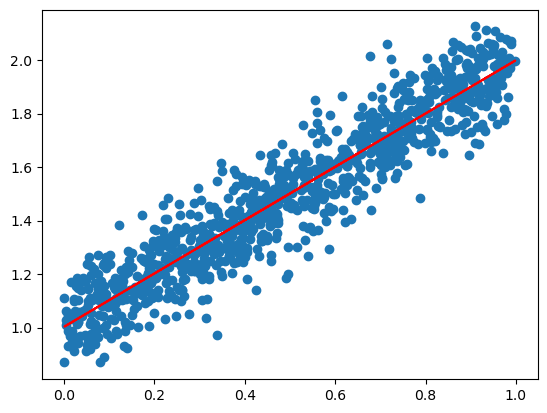

In [13]:
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, color = "red")

In [14]:
slope

0.9975047505294998

In [15]:
intercept

1.0025208907930587

In [16]:
from sklearn.linear_model import LinearRegression

C:\Users\Lohith\miniconda3\envs\CPU\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
reg = LinearRegression()
reg.fit(x.reshape((-1,1)), y)


LinearRegression()

In [18]:
reg.coef_

array([0.99635385])

In [19]:
reg.intercept_

1.0031280483525524

# Inference

In [20]:
print("Difference between Simple Linear Regression and sklearn : ", m - reg.coef_, c - reg.intercept_)
print("Difference between Gradient Descent and sklearn : ", slope - reg.coef_, intercept - reg.intercept_)

Difference between Simple Linear Regression and sklearn :  [-1.22124533e-15] 6.661338147750939e-16
Difference between Gradient Descent and sklearn :  [0.0011509] -0.0006071575594936984


1. The difference between the slopes is very close